In [23]:
import requests
import csv
from bs4 import BeautifulSoup

req = requests.get("https://www.scrapethissite.com/pages/simple/")

with open("data/country.html", 'w', encoding="utf-8") as f:
    f.write(req.text)


In [24]:
list1 = []
soup = BeautifulSoup(req.text, "html.parser")

countries = soup.find_all("div", class_="col-md-4 country")

for country in countries:
    name = country.find("h3", class_="country-name").get_text(strip=True)
    capital = country.find("span", class_="country-capital").get_text(strip=True)
    population = country.find("span", class_="country-population").get_text(strip=True)
    Area_km_square = country.find("span", class_="country-area").get_text(strip=True)
    list1.append([name,capital,population,Area_km_square])
    # print(name, "-", capital , "-", population, "-", Area_km_square )

with open("country.csv", "w", newline="", encoding="utf-8") as f:  
    writer = csv.writer(f)
    writer.writerow(["Country" , "Capital" ,"Population" ,"Area"])
    writer.writerows(list1)
print("file saved as country_info.csv") 

file saved as country_info.csv


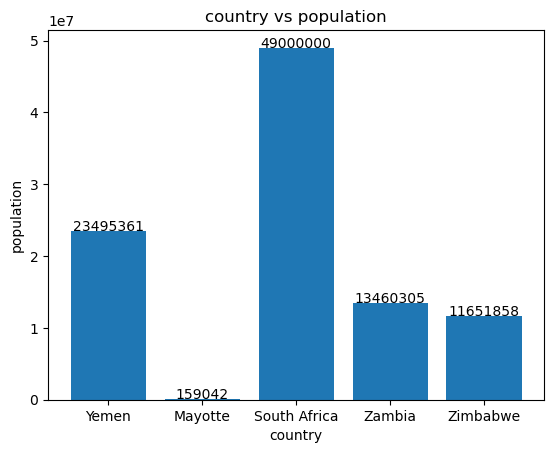

In [26]:
import  pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("country.csv")
df = dataframe.tail(5)
name = df["Country"]
population = df["Population"]

# create visualization using plot
width = 0.24
plt.bar(name,population)

# plt.figure(figsize=(10,5))
# plt.style.use("ggplot") # choos any style you like
# colors = ["#62b6e3" ,"#c760e0","#aeeda6","#e69763"]
# plt.pie(
#     population,
#     labels = name,
#     colors=colors,
#     wedgeprops={'edgecolor': 'k', 'linewidth': 0.4, 'linestyle': '-'}
    
# )
# plt.bar( , '^b:' , label="population")
for i, val in enumerate(population.values):
    plt.text(i, val+1000 , str(val), ha="center")
    
plt.xlabel("country")
plt.ylabel("population")
plt.title("country vs population")
# plt.legend()
plt.show()

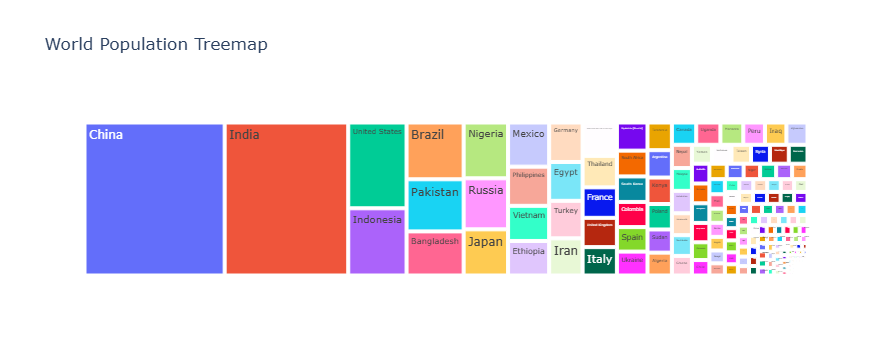

In [28]:
import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_csv("country.csv")  # change file name

# Create treemap
fig = px.treemap(
    df,
    path=["Country"],       # each country
    values="Population",    # size
    title="World Population Treemap"
)

fig.show()

In [29]:
df = pd.read_csv("country.csv")

In [30]:
df

,Country,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


In [33]:
# show highest populated country 

populated = df.iloc[df["Population"].idxmax()]
populated

Country            China
Capital          Beijing
Population    1330044000
Area           9596960.0
Name: 47, dtype: object